# Packages

In [71]:
import random
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import os
import os.path
import csv

# Data download

In [72]:
data_eleves = pd.read_csv('/Users/emelinemaire/Desktop/ENSAE/3A/Réseaux/Projet/wetransfer_eleve18-csv_2022-04-06_1753/eleve18.csv', sep = ';')

/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data preparation

In [73]:
dep_idf = ['095', '078', '091', '092', '093', '094', '077', '075']

In [74]:
acV = ['095', '078', '091', '092']
acC = ['093', '094', '077']

In [75]:
idf_18 = data_eleves[data_eleves['DRES'].isin(dep_idf)]

In [76]:
idf_18.loc[(idf_18['DRES'].isin(acV)),
       'Academie'] = 'Versailles'

idf_18.loc[(idf_18['DRES'].isin(acC)),
       'Academie'] = 'Créteil'

idf_18.loc[(idf_18['DRES'] == '075'),
       'Academie'] = 'Paris'

/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [77]:
idf_18['Academie'].unique()

array(['Créteil', 'Versailles', 'Paris'], dtype=object)

In [78]:
etabs = [i for i in idf_18['NUM_ETAB'].unique()]
len(etabs)

3735

In [79]:
idf_18['PCS1'].unique()

array([43, 38, 56, 37, 69, 34, 33, 52, 42, 22, 62, 46, 67, 47, 55, 53, 99,
       77, 63, 85, 54, 35, 78, 31, 45, 21, 84, 23, 74, 10, 48, 64, 72, 65,
       81, 86, 71, 44, 75, 68, 83])

In [80]:
lower_classes = [10, 21, 22, 52, 53, 54, 55, 
                 56, 62, 63, 64, 
                 65, 67, 68, 69, 81, 85, 86]

In [81]:
idf_18.loc[(idf_18['PCS1'].isin(lower_classes)), 'lwr_class'] = 1

In [82]:
idf_18['lwr_class'].unique()

array([nan,  1.])

### Création des attributs

In [83]:
list_etab = {}
list_attr = [[]]*3735
counter = 0 

for etab in etabs:
    #etab = {'etab' : i}
    cond = "NUM_ETAB == " + "'" + etab + "'"
    df_etab = idf_18.query(cond)
    #df_etab.loc[(df_etab['PCS1'].isin(lower_classes)), 'lwr_class'] = 1
    df_etab['perc_french'] = len(df_etab.query("NATIO_G == 1"))/len(df_etab)
    df_etab['perc_lwrclass'] = len(df_etab[df_etab['PCS1'].isin(lower_classes)])/len(df_etab)
    df_etab['sex_ratio'] = len(df_etab.query("SEXE == 2"))/len(df_etab)
    attrs = {'class' :df_etab['perc_lwrclass'].max(), 'french' : df_etab['perc_french'].max(),
             'sex' : df_etab['sex_ratio'].max()}
    list_etab[etab] = attrs
    list_attr[counter].append([etab, df_etab['perc_lwrclass'].max(), 
                      df_etab['perc_french'].max(), df_etab['sex_ratio'].max()])
    counter = counter+1

/var/folders/z1/w6v_285x6wv5slq1n63cc2980000gn/T/ipykernel_24114/2496393556.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etab['perc_french'] = len(df_etab.query("NATIO_G == 1"))/len(df_etab)
/var/folders/z1/w6v_285x6wv5slq1n63cc2980000gn/T/ipykernel_24114/2496393556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etab['perc_lwrclass'] = len(df_etab[df_etab['PCS1'].isin(lower_classes)])/len(df_etab)
/var/folders/z1/w6v_285x6wv5slq1n63cc2980000gn/T/ipykernel_24114/2496393556.py:12: SettingW

In [84]:
list_etab

{'0010013J': {'class': 0.0, 'french': 1.0, 'sex': 0.0},
 '0010014K': {'class': 0.0, 'french': 1.0, 'sex': 1.0},
 '0010021T': {'class': 0.0, 'french': 1.0, 'sex': 1.0},
 '0010034G': {'class': 1.0, 'french': 1.0, 'sex': 0.0},
 '0010069V': {'class': 0.0, 'french': 1.0, 'sex': 1.0},
 '0010070W': {'class': 0.0, 'french': 1.0, 'sex': 0.0},
 '0011194T': {'class': 0.0, 'french': 1.0, 'sex': 0.0},
 '0020011B': {'class': 0.42857142857142855,
  'french': 1.0,
  'sex': 0.8571428571428571},
 '0020012C': {'class': 0.46153846153846156,
  'french': 1.0,
  'sex': 0.7692307692307693},
 '0020014E': {'class': 0.0, 'french': 1.0, 'sex': 0.0},
 '0020022N': {'class': 1.0, 'french': 1.0, 'sex': 1.0},
 '0020025S': {'class': 0.6666666666666666,
  'french': 1.0,
  'sex': 0.6666666666666666},
 '0020031Y': {'class': 1.0,
  'french': 0.6666666666666666,
  'sex': 0.3333333333333333},
 '0020032Z': {'class': 1.0, 'french': 1.0, 'sex': 0.0},
 '0020038F': {'class': 0.0, 'french': 1.0, 'sex': 1.0},
 '0020048S': {'class':

In [85]:
liste_seconde = ['221114', '221121', '221131', '221141']
df = idf_18[idf_18['MEFST6'].isin(liste_seconde)]

### Description des données

In [16]:
len(df)

107375

In [18]:
len(df['NUM_ETAB'].unique()) #nombre de lycées

769

In [19]:
len(df['NUMETABP'].unique()) #nombre de collèges

2331

In [47]:
print(len(df[df['PCS1'].isin(lower_classes)])/len(df))

0.4470221187427241


In [48]:
print(len(df.query("SEXE == 2"))/len(df))

0.5273387660069848


In [49]:
print(len(df.query("NATIO_G == 1"))/len(df))

0.9213038416763679


In [51]:
print(len(df.query("Academie == 'Créteil'"))/len(df))

0.3760372526193248


In [52]:
print(len(df.query("Academie == 'Versailles'"))/len(df))

0.47518509895227007


In [53]:
print(len(df.query("Academie == 'Paris'"))/len(df))

0.14877764842840513


# Création du réseau

In [86]:
eleves_G = nx.Graph()  # on commence par générer un réseau vide


eleves_G.add_nodes_from(df['NUMETABP'], bipartite=0) # collèges
eleves_G.add_nodes_from(df['NUM_ETAB'], bipartite=1) # lycées

In [87]:
eleves_G.add_edges_from([(Collèges, Lycées) for (Collèges, Lycées)
                          in df[['NUMETABP','NUM_ETAB']].to_numpy()])

In [57]:
print(nx.info(eleves_G))

Graph with 2610 nodes and 14238 edges


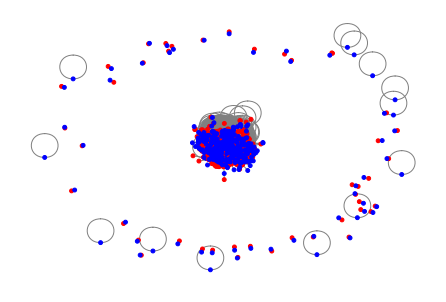

In [58]:
node_color = []

# then, for each node in the graph
for node in eleves_G.nodes(data=True):
    # if the node has the attribute bipartite = 0 (collèges), make it red
    if node[1]['bipartite']==0:
        node_color.append('red')
    # if the node has the attribute bipartite = 1 (lycées), make it blue
    elif node[1]['bipartite']==1:
        node_color.append('blue')


nx.draw(eleves_G, with_labels=False, node_size = 15, node_color=node_color, edge_color = "gray")

In [60]:
nx.set_node_attributes(eleves_G, list_etab)

In [62]:
print(eleves_G.nodes(data=True))

[('0010974D', {'bipartite': 0}), ('0021826Z', {'bipartite': 0, 'class': 0.0, 'french': 1.0, 'sex': 0.0}), ('0920624D', {'bipartite': 0, 'class': 0.4154351395730706, 'french': 0.9441707717569786, 'sex': 0.45320197044334976}), ('0772714G', {'bipartite': 0, 'class': 0.5016949152542373, 'french': 0.9677966101694915, 'sex': 0.47796610169491527}), ('0950751A', {'bipartite': 0, 'class': 0.37349397590361444, 'french': 0.9819277108433735, 'sex': 0.5}), ('0020469Z', {'bipartite': 0, 'class': 0.0, 'french': 1.0, 'sex': 0.0}), ('0951919V', {'bipartite': 0, 'class': 0.4803312629399586, 'french': 0.9544513457556936, 'sex': 0.47619047619047616}), ('0951909J', {'bipartite': 0, 'class': 0.7150442477876107, 'french': 0.7380530973451327, 'sex': 0.45309734513274336}), ('0952088D', {'bipartite': 0, 'class': 0.6692759295499021, 'french': 0.9510763209393346, 'sex': 0.48140900195694714}), ('0780575B', {'bipartite': 0, 'class': 0.2926829268292683, 'french': 0.9193245778611632, 'sex': 0.47842401500938087}), ('0

In [63]:
collèges_nodes = {n for n, d in eleves_G.nodes(data=True) if d["bipartite"] == 0} # these are the companies
lycées_nodes = set(eleves_G) - collèges_nodes

In [64]:
nx.degree(eleves_G, lycées_nodes)

DegreeView({'0370038R': 4, '0350029S': 1, '0772230F': 22, '0950785M': 39, '0950762M': 47, '0754924V': 19, '0951766D': 27, '0930124E': 43, '0530049R': 1, '0100022V': 3, '0782565P': 86, '0021870X': 1, '0753933T': 13, '0940742W': 29, '0951147F': 34, '0720017C': 1, '0930136T': 28, '0910623H': 33, '0511130B': 1, '0782562L': 46, '0750679F': 78, '0771996B': 27, '0782924E': 39, '0753943D': 14, '0783344L': 26, '0132495S': 1, '0753874D': 7, '0590110Z': 1, '0750704H': 52, '0755352K': 5, '0771027Y': 21, '0932117W': 16, '0911938M': 26, '0601831P': 1, '0920799U': 50, '0772188K': 25, '0932229T': 18, '0940121W': 41, '0690035N': 2, '0596122J': 7, '0450042B': 4, '0753824Z': 20, '0780422K': 18, '0951974E': 31, '0350783L': 3, '0761715B': 9, '0753384W': 1, '0931796X': 32, '0781845G': 31, '0750688R': 38, '0851642Y': 2, '0754476H': 14, '0920802X': 74, '0753849B': 12, '0511140M': 39, '0920917X': 27, '0601824G': 1, '0771720B': 15, '0951937P': 14, '0920908M': 21, '0951399E': 37, '0912364A': 34, '0440024M': 1, '

Densité

In [67]:
len(eleves_G.edges())/(len(collèges_nodes)*len(lycées_nodes))

0.010057009498286749

In [70]:
nx.degree(eleves_G, lycées_nodes)

DegreeView({'0370038R': 4, '0350029S': 1, '0772230F': 22, '0950785M': 39, '0950762M': 47, '0754924V': 19, '0951766D': 27, '0930124E': 43, '0530049R': 1, '0100022V': 3, '0782565P': 86, '0021870X': 1, '0753933T': 13, '0940742W': 29, '0951147F': 34, '0720017C': 1, '0930136T': 28, '0910623H': 33, '0511130B': 1, '0782562L': 46, '0750679F': 78, '0771996B': 27, '0782924E': 39, '0753943D': 14, '0783344L': 26, '0132495S': 1, '0753874D': 7, '0590110Z': 1, '0750704H': 52, '0755352K': 5, '0771027Y': 21, '0932117W': 16, '0911938M': 26, '0601831P': 1, '0920799U': 50, '0772188K': 25, '0932229T': 18, '0940121W': 41, '0690035N': 2, '0596122J': 7, '0450042B': 4, '0753824Z': 20, '0780422K': 18, '0951974E': 31, '0350783L': 3, '0761715B': 9, '0753384W': 1, '0931796X': 32, '0781845G': 31, '0750688R': 38, '0851642Y': 2, '0754476H': 14, '0920802X': 74, '0753849B': 12, '0511140M': 39, '0920917X': 27, '0601824G': 1, '0771720B': 15, '0951937P': 14, '0920908M': 21, '0951399E': 37, '0912364A': 34, '0440024M': 1, '

In [65]:
eleves_G_2 = nx.bipartite.weighted_projected_graph(eleves_G, lycées_nodes, ratio=False)
print(nx.info(eleves_G_2))

Graph with 2529 nodes and 94207 edges


In [66]:
eleves_G_2.edges(data = True)

EdgeDataView([('0370038R', '0772292Y', {'weight': 1}), ('0370038R', '0951104J', {'weight': 1}), ('0370038R', '0950796Z', {'weight': 1}), ('0370038R', '0951748J', {'weight': 1}), ('0370038R', '0750655E', {'weight': 1}), ('0370038R', '0600012M', {'weight': 1}), ('0370038R', '0951945Y', {'weight': 1}), ('0370038R', '0950941G', {'weight': 1}), ('0370038R', '0951399E', {'weight': 1}), ('0370038R', '0951710T', {'weight': 1}), ('0370038R', '0782563M', {'weight': 1}), ('0370038R', '0950646L', {'weight': 1}), ('0370038R', '0951723G', {'weight': 1}), ('0370038R', '0951756T', {'weight': 1}), ('0370038R', '0782565P', {'weight': 1}), ('0370038R', '0782567S', {'weight': 1}), ('0370038R', '0952145R', {'weight': 1}), ('0370038R', '0601150Z', {'weight': 1}), ('0370038R', '0770942F', {'weight': 1}), ('0370038R', '0951147F', {'weight': 1}), ('0370038R', '0951722F', {'weight': 1}), ('0370038R', '0772275E', {'weight': 1}), ('0370038R', '0752552S', {'weight': 1}), ('0370038R', '0951637N', {'weight': 1}), ('

In [88]:
len(eleves_G_2.edges())/(len(collèges_nodes)*len(lycées_nodes))

0.06654310252880319

In [61]:
nx.write_gexf(eleves_G, 'projet.gexf')
#On exporte le réseau ainsi que les attributs pour pouvoir le traiter 
#sur Gephi